In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from PIL.ImageOps import scale
from sympy import rotations

如果要读入xlsx文件，需要安装pandas和openpyxl

In [2]:
# 读入代码
dataset = pd.read_excel('Solar station site 4 (Nominal capacity-130MW).xlsx')
dataset

,Time(year-month-day h:m:s),Total solar irradiance (W/m2),Direct normal irradiance (W/m2),Global horizontal irradiance (W/m2),Air temperature (°C),Atmosphere (hpa),Relative humidity (%),Power (MW)
0,2019-01-01 00:00:00,0.0,0.0,0.0,-1.332946,1005.940641,87.694945,-0.273
1,2019-01-01 00:15:00,0.0,0.0,0.0,-2.890274,995.880886,94.578084,-0.285
2,2019-01-01 00:30:00,0.0,0.0,0.0,-3.091485,1022.683671,84.012239,-0.314
3,2019-01-01 00:45:00,0.0,0.0,0.0,-4.123396,995.284713,91.076423,-0.314
4,2019-01-01 01:00:00,0.0,0.0,0.0,-4.226904,1098.326082,91.804535,-0.314
...,...,...,...,...,...,...,...,...
70171,2020-12-31 22:45:00,0.0,0.0,0.0,3.738303,1072.128231,41.310609,-0.244
70172,2020-12-31 23:00:00,0.0,0.0,0.0,3.314716,1015.363076,37.077426,-0.244
70173,2020-12-31 23:15:00,0.0,0.0,0.0,3.203881,1008.888847,37.183494,-0.273
70174,2020-12-31 23:30:00,0.0,0.0,0.0,2.832510,1045.152968,35.940060,-0.273


In [3]:
# 其中太阳辐射强度，温度，湿度，风速会影响光伏输出功率
# 有功功率为负数，说明是发电
# 倒序
dataset.sort_index(inplace=True)
# 预测一小时之后
pre_mins = 4
# 设置标签，标签即为目标，如预测的结果
dataset['label'] = dataset['Power (MW)'].shift(-pre_mins)
# 选择列显示
dataset.loc[:, ['Time(year-month-day h:m:s)', 'Power (MW)', 'label']]

,Time(year-month-day h:m:s),Power (MW),label
0,2019-01-01 00:00:00,-0.273,-0.314
1,2019-01-01 00:15:00,-0.285,-0.314
2,2019-01-01 00:30:00,-0.314,-0.314
3,2019-01-01 00:45:00,-0.314,-0.303
4,2019-01-01 01:00:00,-0.314,-0.314
...,...,...,...
70171,2020-12-31 22:45:00,-0.244,-0.273
70172,2020-12-31 23:00:00,-0.244,NaN
70173,2020-12-31 23:15:00,-0.273,NaN
70174,2020-12-31 23:30:00,-0.273,NaN


In [4]:
# 数据预处理-1
# 为NaN的值填为0
dataset.fillna(0)

,Time(year-month-day h:m:s),Total solar irradiance (W/m2),Direct normal irradiance (W/m2),Global horizontal irradiance (W/m2),Air temperature (°C),Atmosphere (hpa),Relative humidity (%),Power (MW),label
0,2019-01-01 00:00:00,0.0,0.0,0.0,-1.332946,1005.940641,87.694945,-0.273,-0.314
1,2019-01-01 00:15:00,0.0,0.0,0.0,-2.890274,995.880886,94.578084,-0.285,-0.314
2,2019-01-01 00:30:00,0.0,0.0,0.0,-3.091485,1022.683671,84.012239,-0.314,-0.314
3,2019-01-01 00:45:00,0.0,0.0,0.0,-4.123396,995.284713,91.076423,-0.314,-0.303
4,2019-01-01 01:00:00,0.0,0.0,0.0,-4.226904,1098.326082,91.804535,-0.314,-0.314
...,...,...,...,...,...,...,...,...,...
70171,2020-12-31 22:45:00,0.0,0.0,0.0,3.738303,1072.128231,41.310609,-0.244,-0.273
70172,2020-12-31 23:00:00,0.0,0.0,0.0,3.314716,1015.363076,37.077426,-0.244,0.000
70173,2020-12-31 23:15:00,0.0,0.0,0.0,3.203881,1008.888847,37.183494,-0.273,0.000
70174,2020-12-31 23:30:00,0.0,0.0,0.0,2.832510,1045.152968,35.940060,-0.273,0.000


In [5]:
# 相关性分析
# X = dataset.loc[0:1000, 'Wind_Speed']
# Y = dataset.loc[0:1000, 'Active_Power']
# print(X)
# print(Y)
# pandas包下的相关性分析
# result_1 = X.corr(Y)
# print(result_1)
dataset_without_first_column = dataset.iloc[:, 1:]
result_3 = dataset_without_first_column.corr()
result_3

,Total solar irradiance (W/m2),Direct normal irradiance (W/m2),Global horizontal irradiance (W/m2),Air temperature (°C),Atmosphere (hpa),Relative humidity (%),Power (MW),label
Total solar irradiance (W/m2),1.000000,0.814575,0.814576,0.355829,-0.000310,-0.373735,0.945840,0.857769
Direct normal irradiance (W/m2),0.814575,1.000000,0.999999,0.404639,0.021234,-0.456095,0.803263,0.744373
Global horizontal irradiance (W/m2),0.814576,0.999999,1.000000,0.404676,0.021224,-0.456091,0.803267,0.744369
Air temperature (°C),0.355829,0.404639,0.404676,1.000000,0.021207,-0.246286,0.297505,0.255444
Atmosphere (hpa),-0.000310,0.021234,0.021224,0.021207,1.000000,0.246820,-0.001993,0.000186
Relative humidity (%),-0.373735,-0.456095,-0.456091,-0.246286,0.246820,1.000000,-0.393357,-0.306405
Power (MW),0.945840,0.803263,0.803267,0.297505,-0.001993,-0.393357,1.000000,0.909629
label,0.857769,0.744373,0.744369,0.255444,0.000186,-0.306405,0.909629,1.000000


In [6]:
result_4 = result_3['Power (MW)'][result_3['Power (MW)'] > 0.8]
result_4 = result_4.drop('Power (MW)')
result_4 = result_4.drop('label')
print(type(result_4))
result_4

<class 'pandas.core.series.Series'>


Total solar irradiance (W/m2)          0.945840
Direct normal irradiance (W/m2)        0.803263
Global horizontal irradiance (W/m2)    0.803267
Name: Power (MW), dtype: float64

<Axes: >

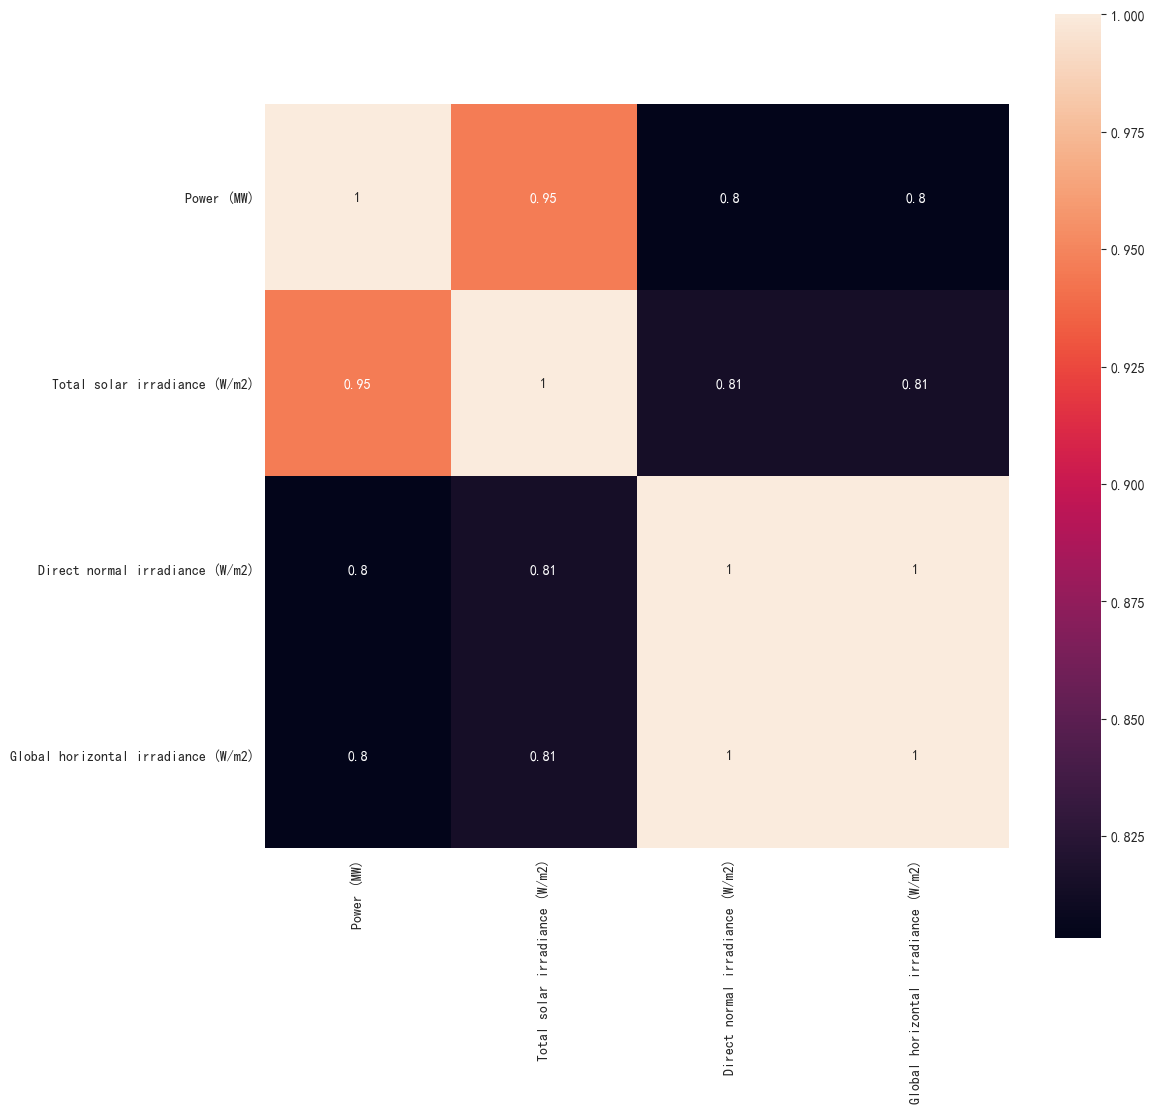

In [7]:
# 相关性绘图
# 热力图
import matplotlib as mpl
import seaborn as sns
# 显示汉字
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
result_5 = dataset.loc[:, 
           ['Power (MW)', 'Total solar irradiance (W/m2)', 'Direct normal irradiance (W/m2)', 'Global horizontal irradiance (W/m2)']]
figure, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(result_5.corr(), square=True, annot=True, ax=ax)

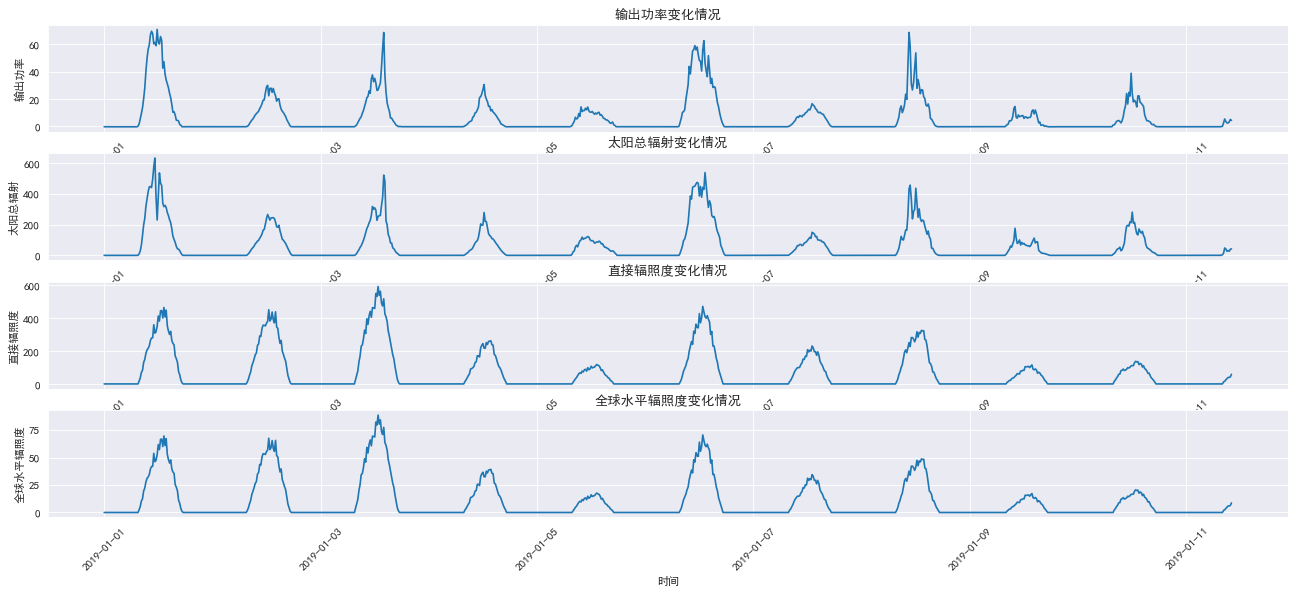

In [8]:
# 绘制相关数据的时间曲线，看是否有异常数据
fig = plt.figure(figsize=(20, 8), dpi=80)
# 行，列，索引
plt.subplot(4, 1, 1)
X_1 = dataset.loc[0:1000, 'Time(year-month-day h:m:s)']
Y_1 = dataset.loc[0:1000, 'Power (MW)']
plt.plot(X_1, Y_1)
plt.xticks(rotation=45)
plt.xlabel('时间')
plt.ylabel('输出功率')
plt.title('输出功率变化情况')

plt.subplot(4, 1, 2)
Y_1 = dataset.loc[0:1000, 'Total solar irradiance (W/m2)']
plt.plot(X_1, Y_1)
plt.xticks(rotation=45)
plt.xlabel('时间')
plt.ylabel('太阳总辐射')
plt.title('太阳总辐射变化情况')

plt.subplot(4, 1, 3)
Y_1 = dataset.loc[0:1000, 'Direct normal irradiance (W/m2)']
plt.plot(X_1, Y_1)
plt.xticks(rotation=45)
plt.xlabel('时间')
plt.ylabel('直接辐照度')
plt.title('直接辐照度变化情况')

plt.subplot(4, 1, 4)
Y_1 = dataset.loc[0:1000, 'Global horizontal irradiance (W/m2)']
plt.plot(X_1, Y_1)
plt.xticks(rotation=45)
plt.xlabel('时间')
plt.ylabel('全球水平辐照度')
plt.title('全球水平辐照度变化情况')

plt.show()

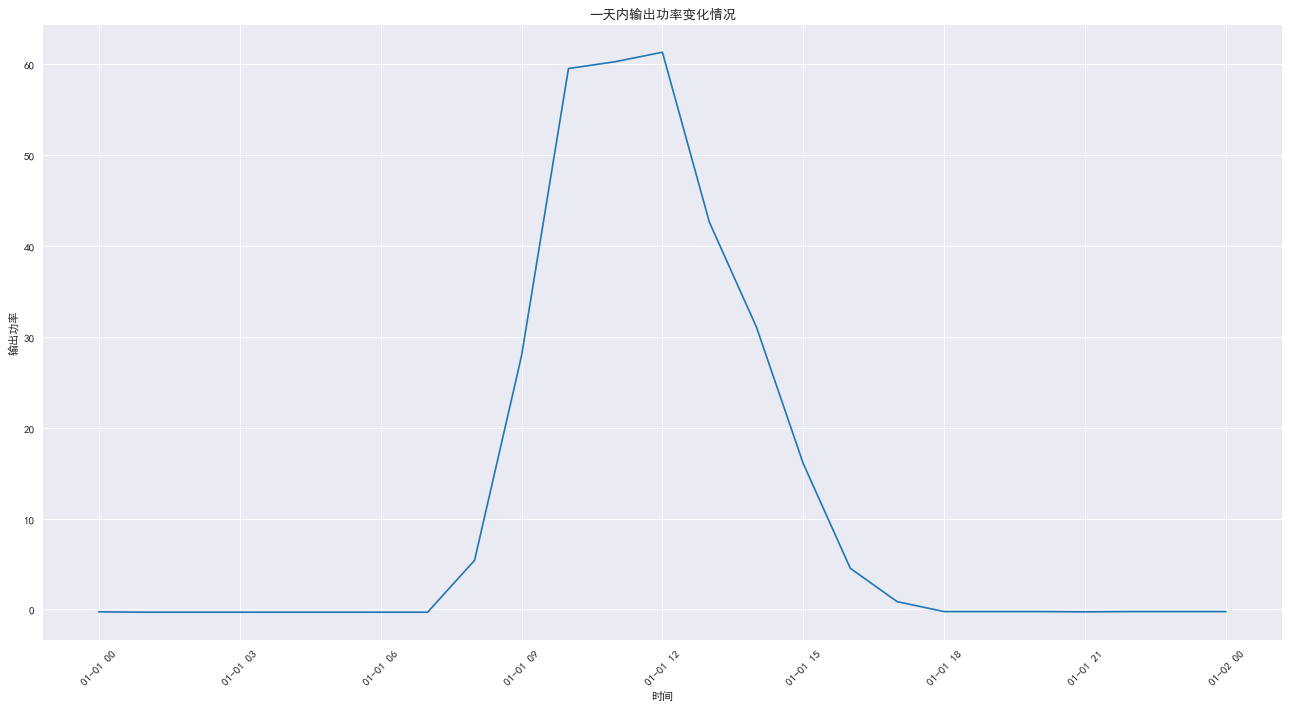

In [9]:
# 此时我注意到，在夜晚时间中，是不用考虑数据功率的，于是我绘制一天的时间变化，选取白天06:00--18:00的数据：
# 显示一天中输出功率的大致时间
# 行，列，索引
plt.figure(figsize=(20, 10), dpi=80)
X_2 = dataset.loc[0 : 96 : 4, 'Time(year-month-day h:m:s)']
Y_2 = dataset.loc[0 : 96 : 4, 'Power (MW)']

plt.xticks(rotation=45)
plt.plot(X_2, Y_2)
plt.xlabel('时间')
plt.ylabel('输出功率')
plt.title('一天内输出功率变化情况')
plt.show()


In [20]:
# 不知道为什么第一行的元素读进来直接就是datetime.datetime对象了，所以下面在处理的时候要加一行先将它转为str
# dataset['Time(year-month-day h:m:s)']
print(dataset['Time(year-month-day h:m:s)'].iloc[0])
print(dataset['Time(year-month-day h:m:s)'].iloc[1])
print(dataset['Time(year-month-day h:m:s)'].iloc[2])
print(dataset['Time(year-month-day h:m:s)'].iloc[55])
print(type(dataset['Time(year-month-day h:m:s)'].iloc[0]))
print(type(dataset['Time(year-month-day h:m:s)'].iloc[1]))
print(type(dataset['Time(year-month-day h:m:s)'].iloc[2]))
print(type(dataset['Time(year-month-day h:m:s)'].iloc[55]))

2019-01-01 00:00:00
2019-01-01 00:15:00
2019-01-01 00:30:00
2019-01-01 13:45:00
<class 'datetime.datetime'>
<class 'str'>
<class 'str'>
<class 'str'>


In [21]:
# 由图可知，晚上输出功率为0，选取每天06:00--18:00的数据
from datetime import datetime
dataset['Time(year-month-day h:m:s)'].iloc[0] = dataset['Time(year-month-day h:m:s)'].iloc[0].strftime('%Y-%m-%d %H:%M:%S')
dataset['datetime'] = dataset['Time(year-month-day h:m:s)'].apply(lambda x:datetime.strptime(x, "%Y-%m-%d %H:%M:%S").hour)
# dataset['datetime'] = dataset['Time(year-month-day h:m:s)'].apply(lambda x: x.hour)
filred_data = dataset[(dataset['datetime'] >= 6) & (dataset['datetime'] <= 18)]
filred_data = filred_data.fillna(0)
filred_data

C:\Users\Titanium\AppData\Local\Temp\ipykernel_2096\893704502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Time(year-month-day h:m:s)'].iloc[0] = dataset['Time(year-month-day h:m:s)'].iloc[0].strftime('%Y-%m-%d %H:%M:%S')


,Time(year-month-day h:m:s),Total solar irradiance (W/m2),Direct normal irradiance (W/m2),Global horizontal irradiance (W/m2),Air temperature (°C),Atmosphere (hpa),Relative humidity (%),Power (MW),label,datetime
24,2019-01-01 06:00:00,0.0,0.000000,0.000000,-3.858242,1040.797581,95.260504,-0.314,-0.314,6
25,2019-01-01 06:15:00,0.0,0.000000,0.000000,-4.357601,1039.947963,100.000000,-0.314,-0.314,6
26,2019-01-01 06:30:00,0.0,0.000000,0.000000,-4.121360,1015.730558,86.367044,-0.314,0.085,6
27,2019-01-01 06:45:00,0.0,0.000000,0.000000,-3.776707,1058.196520,97.782024,-0.314,1.770,6
28,2019-01-01 07:00:00,0.0,0.000000,0.000000,-4.732585,1062.250365,100.000000,-0.314,5.391,7
...,...,...,...,...,...,...,...,...,...,...
70151,2020-12-31 17:45:00,0.4,9.476864,0.714934,7.492490,1046.063341,31.261065,-0.273,-0.233,17
70152,2020-12-31 18:00:00,0.0,0.000000,0.000000,7.560731,1057.992113,38.446431,-0.244,-0.233,18
70153,2020-12-31 18:15:00,0.0,0.000000,0.000000,8.026993,1021.261795,33.833911,-0.244,-0.233,18
70154,2020-12-31 18:30:00,0.0,0.000000,0.000000,7.385304,1007.205806,32.628909,-0.244,-0.233,18


In [22]:
# 去除掉不相干的列
filred_data = filred_data.drop('datetime', axis=1)
filred_data = filred_data.drop('Air temperature  (°C) ', axis=1)
filred_data = filred_data.drop('Atmosphere (hpa)', axis=1)
filred_data = filred_data.drop('Relative humidity (%)', axis=1)
filred_data

,Time(year-month-day h:m:s),Total solar irradiance (W/m2),Direct normal irradiance (W/m2),Global horizontal irradiance (W/m2),Power (MW),label
24,2019-01-01 06:00:00,0.0,0.000000,0.000000,-0.314,-0.314
25,2019-01-01 06:15:00,0.0,0.000000,0.000000,-0.314,-0.314
26,2019-01-01 06:30:00,0.0,0.000000,0.000000,-0.314,0.085
27,2019-01-01 06:45:00,0.0,0.000000,0.000000,-0.314,1.770
28,2019-01-01 07:00:00,0.0,0.000000,0.000000,-0.314,5.391
...,...,...,...,...,...,...
70151,2020-12-31 17:45:00,0.4,9.476864,0.714934,-0.273,-0.233
70152,2020-12-31 18:00:00,0.0,0.000000,0.000000,-0.244,-0.233
70153,2020-12-31 18:15:00,0.0,0.000000,0.000000,-0.244,-0.233
70154,2020-12-31 18:30:00,0.0,0.000000,0.000000,-0.244,-0.233


In [23]:
# 调整序号（index是csv文件使用pandas读入python之后自动分配的，所以在筛选掉一些行之后会出现不连续的情况）
filred_data = filred_data.reset_index(drop=True)
filred_data

,Time(year-month-day h:m:s),Total solar irradiance (W/m2),Direct normal irradiance (W/m2),Global horizontal irradiance (W/m2),Power (MW),label
0,2019-01-01 06:00:00,0.0,0.000000,0.000000,-0.314,-0.314
1,2019-01-01 06:15:00,0.0,0.000000,0.000000,-0.314,-0.314
2,2019-01-01 06:30:00,0.0,0.000000,0.000000,-0.314,0.085
3,2019-01-01 06:45:00,0.0,0.000000,0.000000,-0.314,1.770
4,2019-01-01 07:00:00,0.0,0.000000,0.000000,-0.314,5.391
...,...,...,...,...,...,...
38007,2020-12-31 17:45:00,0.4,9.476864,0.714934,-0.273,-0.233
38008,2020-12-31 18:00:00,0.0,0.000000,0.000000,-0.244,-0.233
38009,2020-12-31 18:15:00,0.0,0.000000,0.000000,-0.244,-0.233
38010,2020-12-31 18:30:00,0.0,0.000000,0.000000,-0.244,-0.233


In [24]:
# 这个时候再来查找异常值，异常值的定义有很多方式：3a法，Z_score法，箱线法等。这里采用3a法：
# 用3sigma法找出超出（u-3a, u+3a）的值
import numpy as np
def three_sigma(ser):
    # 计算平均值
    mean_data = ser.mean()
    # 计算标准差
    std_data = ser.std()
    rule = (mean_data - 3 * std_data > ser) | (mean_data + 3 * std_data < ser)
    # 生成一个从0开始，到ser长度-1结束的连续索引，再根据rule列表中的True值，直接保留所有为True的索引，也就是异常值的行索引
    index = np.arange(ser.shape[0])[rule]
    # 获取异常值
    outliers = ser.iloc[index]
    return outliers

# 异常值处理
# mean_data = filred_data[''].mean()
# mean_data

In [ ]:
# 异常值的处理有很多方式，插值替代，均值替代等。这里我选用的是均值替代：
# 由图可知，对温度1的数据进行异常值处理：均值替代
# 经常用的还有插值法
# error_data = three_sigma(filred_data['Temperature_Probe_1'])
# true_data = filred_data['Temperature_Probe_1']
# print(error_data)
# for i, v in error_data.items():
#     true_data[i] = mean_data
# 
# plt.figure(figsize=(200, 10), dpi=80)
# X_1 = filred_data.loc[0:1000, 'timestamp']
# Y_1 = true_data[0:1001]
# plt.plot(X_1, Y_1)
# plt.xlabel('时间')
# plt.ylabel('温度1')
# plt.title('修正后温度1变化情况')
# plt.show()

然后可以开始准备训练数据了。首先是标准化，主要是为了避免不同量纲的影响，可以采用0-1归一化：

In [25]:
# 标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 注意左闭右开
# 归一化是为了避免不同量纲的影响
X_3 = scaler.fit_transform(filred_data.iloc[:, 1:5])    # 这里好像是对所有的列都使用了

然后划分训练集（80%），测试集（20%）以及其y值（就是预测的结果）：

In [26]:
# 0.8为训练集，0.2为测试集
train_size = int(len(X_3) * 0.8)
test_size = int(len(X_3)) - train_size
train_data = X_3[0:train_size, 0:4]
# y值是对应的预测值
y_train_data = list(filred_data.iloc[0:train_size, 5])
test_data = X_3[train_size:, 0:4]
y_test_data = list(filred_data.iloc[train_size:, 5])

In [27]:
# LSTM模型构建，多输入单输出
# 取一定时间内的数据作为输入，预测该时间后一段时间的label，最后不断缩小差值loss
# 记忆的天数
men_days = 5

from collections import deque
deq = deque(maxlen=men_days)

X_4 = []
for i in train_data:
    deq.append(list(i))
    if len(deq) == men_days:
        X_4.append(list((deq)))
X_Test = []
for i in test_data:
    deq.append(list(i))
    if len(deq) == men_days:
        X_Test.append(list((deq)))

X_4 = np.array(X_4)
X_Test = np.array(X_Test)

对齐一下array的长度：

In [28]:
y_train_data = np.array(y_train_data[:-men_days+1])
y_test_data = np.array(y_test_data[:])

开始创建并训练LSTM:

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X_4_tensor = torch.Tensor(X_4)
y_train_data_tensor = torch.Tensor(y_train_data)
train_dataset = TensorDataset(X_4_tensor, y_train_data_tensor)
train_loader = DataLoader(train_dataset, batch_size=20, shuffle=False)

X_Test_tensor = torch.Tensor(X_Test)
y_test_data_tensor = torch.Tensor(y_test_data)

test_dataset = TensorDataset(X_Test_tensor, y_test_data_tensor)
test_loader = DataLoader(test_dataset, batch_size=20, shuffle=False)

In [30]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        lstm_out, (hn, cn) = self.lstm(x)
        lstm_out = lstm_out[:, -1, :]
        lstm_out = self.dropout(lstm_out)
        out = self.fc(lstm_out)
        return out

# 模型超参数
input_size = X_4.shape[2]
hidden_size = 32
output_size = 1

model = LSTMModel(input_size, hidden_size, output_size)

criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [31]:
epochs = 20
train_loss = []
test_loss = []
for epoch in range(epochs):
    model.train()
    running_train_loss =0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.float(), labels.float()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item()
    # print(f"Epoch {epoch+1}/{epochs}, Loss: {running_train_loss/len(train_loader)}")
    avg_train_loss = running_train_loss / len(train_loader)
    train_loss.append(avg_train_loss)
    
    model.eval()
    running_test_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.float(), labels.float()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            running_test_loss += loss.item()
    avg_test_loss = running_test_loss / len(test_loader)
    test_loss.append(avg_test_loss)
    
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")
    
print("Training completed.")

Epoch 1/20, Train Loss: 20.0485, Test Loss: 16.4568
Epoch 2/20, Train Loss: 10.5012, Test Loss: 12.6757
Epoch 3/20, Train Loss: 6.5058, Test Loss: 11.2406
Epoch 4/20, Train Loss: 5.1467, Test Loss: 10.9517
Epoch 5/20, Train Loss: 4.6892, Test Loss: 10.9233
Epoch 6/20, Train Loss: 4.4948, Test Loss: 10.6639
Epoch 7/20, Train Loss: 4.4178, Test Loss: 10.9159
Epoch 8/20, Train Loss: 4.3893, Test Loss: 10.6191
Epoch 9/20, Train Loss: 4.3371, Test Loss: 10.7027
Epoch 10/20, Train Loss: 4.2436, Test Loss: 10.7229
Epoch 11/20, Train Loss: 4.2399, Test Loss: 10.7318
Epoch 12/20, Train Loss: 4.1783, Test Loss: 10.6014
Epoch 13/20, Train Loss: 4.1752, Test Loss: 10.6886
Epoch 14/20, Train Loss: 4.1449, Test Loss: 10.6038
Epoch 15/20, Train Loss: 4.0817, Test Loss: 10.6830
Epoch 16/20, Train Loss: 4.1160, Test Loss: 10.5827
Epoch 17/20, Train Loss: 4.1032, Test Loss: 10.6837
Epoch 18/20, Train Loss: 4.0692, Test Loss: 10.6124
Epoch 19/20, Train Loss: 4.0345, Test Loss: 10.6757
Epoch 20/20, Train 

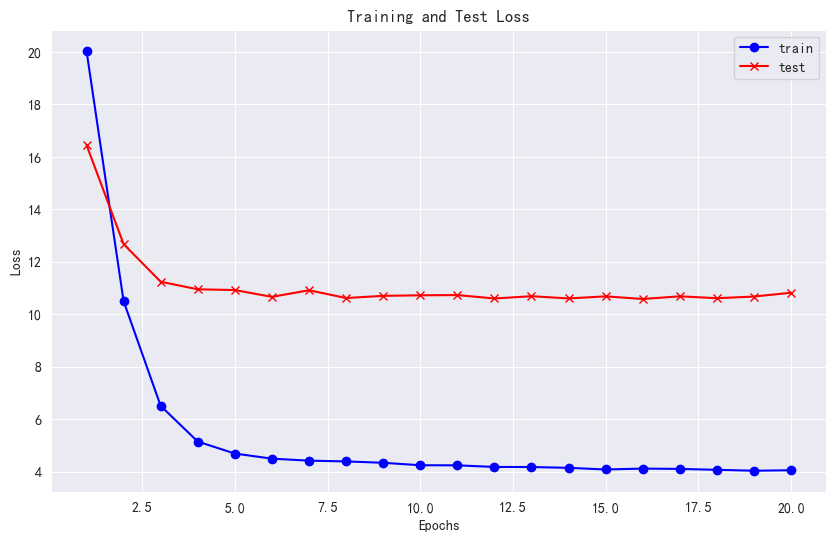

In [32]:
# train_loss = [108.5445, 50.5858, 45.5425, 44.2652, 43.4511, 43.0366, 42.6534, 42.2138, 42.1469, 41.7118,
#                       41.5391, 41.2868, 41.0170, 40.8043, 40.6392, 40.3715, 40.2170, 40.1397, 39.9838, 39.7732]
# test_loss = [78.4362, 72.3282, 70.0858, 69.5689, 68.8988, 68.2778, 67.2957, 67.9257, 67.3579, 67.1911, 
#              66.4715, 66.6048, 65.6953, 65.5595, 65.9595, 65.4549, 65.8022, 66.0899, 65.3669, 65.9876]
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_loss, label='train', color='blue', marker='o')
plt.plot(range(1, epochs + 1), test_loss, label='test', color='red', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

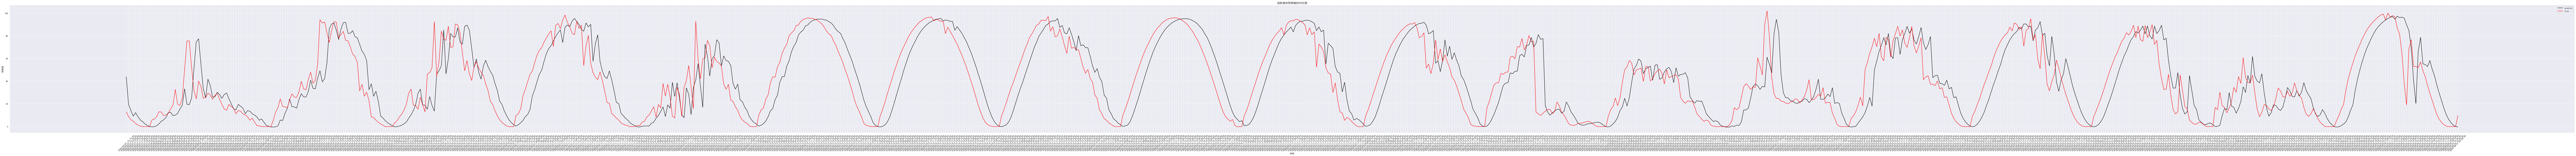

In [35]:
from numpy import concatenate
# print(X_Test)
model.eval()
with torch.no_grad():
    y_predict = model(X_Test_tensor)
y_predict.squeeze()
x_predict = filred_data.loc[train_size:, 'Time(year-month-day h:m:s)']
plt.figure(figsize=(200,10),dpi=80)
plt.plot(x_predict[0:1000],y_predict[0:1000],color='black', label='predict')
plt.plot(x_predict[0:1000],y_test_data[0:1000],color='red', label='true')
plt.xticks(rotation=45)
plt.xlabel('时间')
plt.ylabel('预测值')
plt.title('实际值和预测值的对比图')
plt.legend()
plt.show()